# ***Image em***

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
path = "/dog_0000.jpg"

In [ ]:
img  = cv2.imread(path)

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

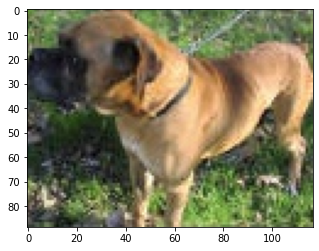

In [ ]:
plt.imshow(img)

In [ ]:
import torch 
from torchvision import models

In [ ]:
frncc = models.detection.fasterrcnn_resnet50_fpn(pretrained=True,progress=True)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device.type

'cpu'

In [ ]:
frncc = frncc.to(device)

In [ ]:
frncc.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [ ]:
img_tensor = torch.tensor(img,dtype=torch.float)

In [ ]:
img_tensor.shape

torch.Size([533, 800, 3])

In [ ]:
img_tensor = img_tensor.permute(2,0,1)

In [ ]:
img_tensor = img_tensor.unsqueeze(axis=0)

In [ ]:
img_tensor.shape

torch.Size([1, 3, 533, 800])

In [ ]:
img_tensor = img_tensor/img_tensor.max()

In [ ]:
img_tensor = img_tensor.to(device)

In [ ]:
pred = frncc(img_tensor)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
pred

[{'boxes': tensor([[4.5489e+02, 1.9623e+02, 5.8624e+02, 2.9087e+02],
          [5.8957e-01, 4.0985e+02, 1.6827e+02, 5.3300e+02],
          [1.9164e+02, 1.1908e+02, 2.8468e+02, 1.9687e+02],
          [3.7292e+02, 1.2919e+02, 4.7884e+02, 2.1252e+02],
          [5.6500e+02, 9.8230e+01, 6.5402e+02, 1.8616e+02],
          [3.3337e+02, 4.2052e+02, 5.5305e+02, 5.3165e+02],
          [1.1106e+01, 3.1860e+02, 1.8536e+02, 4.5412e+02],
          [5.2390e+02, 8.6882e+01, 6.0568e+02, 1.5138e+02],
          [3.2208e+02, 7.4534e+01, 3.9667e+02, 1.4633e+02],
          [6.2110e+02, 3.5039e+02, 6.6503e+02, 3.9174e+02],
          [4.1368e+02, 1.6359e+02, 5.2204e+02, 2.5648e+02],
          [6.3733e+02, 1.6079e+02, 7.2667e+02, 2.4131e+02],
          [3.8416e+02, 3.5252e+02, 4.3631e+02, 3.8790e+02],
          [2.6373e+02, 2.6674e+01, 3.2274e+02, 8.1873e+01],
          [4.4745e+02, 3.9981e+01, 5.1580e+02, 9.6796e+01],
          [2.9379e+02, 4.3649e+01, 3.6122e+02, 1.0044e+02],
          [5.3444e+02, 2.7707e+

In [ ]:
COCO = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
COCO[pred[0]['labels'][pred[0]['scores'].argmax()]]

'car'

In [ ]:
import numpy as np

x=pred[0]['scores']
pos = [np.where(x==i)[0][0] for i in x[x>0.5]]
pos

In [ ]:
coords = pred[0]['boxes'].cpu().detach().numpy()[1].tolist()

In [ ]:
xmin,ymin,xmax,ymax=[int(i) for i in coords]

In [ ]:
im=cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(0,0,0),thickness=10)

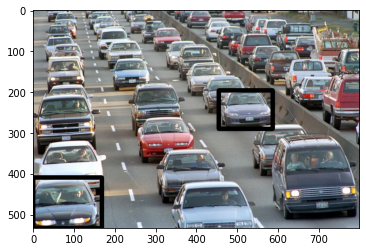

In [ ]:
plt.imshow(im)

In [ ]:
for i in pos:
  coords = pred[0]['boxes'].cpu().detach().numpy()[i].tolist()
  xmin,ymin,xmax,ymax=[int(i) for i in coords]
  #print([0])
  a=int(pred[0]['labels'][i])*50
  im=cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(0,0,a),thickness=10)

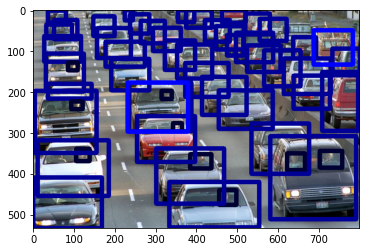

In [ ]:
plt.imshow(im)

In [ ]:

frncc = models.detection.fasterrcnn_resnet50_fpn(pretrained=True,progress=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
frncc = frncc.to(device)
frncc.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [ ]:
def img_read(path):
  img  = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return(img)

In [ ]:
def img_to_tensor(img):
  img_tensor = torch.tensor(img,dtype=torch.float)
  img_tensor = img_tensor.permute(2,0,1)
  img_tensor = img_tensor.unsqueeze(axis=0)
  img_tensor = img_tensor/img_tensor.max()
  img_tensor = img_tensor.to(device)
  return img_tensor

In [ ]:
img_to_tensor(img).shape

torch.Size([1, 3, 533, 800])

In [ ]:
pred=frncc(img_to_tensor(img))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
pred[0]['boxes'].cpu().detach().numpy()[1].tolist()

[0.5895640254020691, 409.8534240722656, 168.27500915527344, 533.0]

In [ ]:
g=pred[0]['labels'][0]
int(g)

3

In [ ]:
def plot(pred,thres):
  x=pred[0]['scores'].cpu().detach().numpy()
  pos = [np.where(x==i)[0][0] for i in x[x>thres]]
  pos
  for i in pos:
    coords_c = (pred[0]['boxes']).cpu().detach().numpy()[i].tolist()
    xmin,ymin,xmax,ymax=[int(i) for i in coords_c]
    #print([0])
    a=int(pred[0]['labels'][i])*60
    im=cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(0,0,a),thickness=2)
    im=cv2.putText(img,COCO[pred[0]['labels'][i]],(xmin,ymax),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(255,255,0),thickness=2,lineType=cv2.LINE_AA)
  return(plt.imshow(im))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


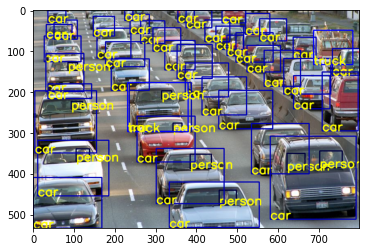

In [ ]:
img=img_read(path)
img_to_tensor(img)
plot(frncc(img_to_tensor(img)),0.5)